In [12]:
import os
import numpy as np

import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import glob
import random

from gan_utils import StarGAN_generator
import image_utils

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load GANs
## StarGAN

In [9]:
def plot_all_attr_values(img, attr):
    values = StarGAN.LABELS[attr].keys()
    n_cols = len(values)+1
    fig, axarr = plt.subplots(1, n_cols, figsize=(n_cols*2, 2))
    
    axarr[0].imshow(img)
    axarr[0].axis('off')
    for idx, v in enumerate(values):
        ax = axarr[idx+1]
        fake_img = StarGAN.generate_image(img, attr, v)
        ax.imshow(fake_img)
        ax.axis('off')

    plt.show()

In [10]:
StarGAN = StarGAN_generator('./generators/stargan/')

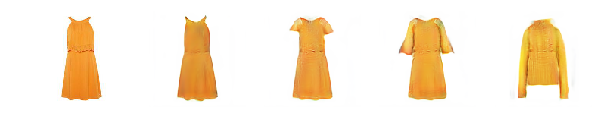

In [11]:
test_img_path = './test_images/dresses_sample/1003190021.jpg'
test_img = Image.open(test_img_path)
plot_all_attr_values(test_img, 'sleeve_length')

# Find Similar Images

In [29]:
feature_path = './test_features/dresses_sample/resnet_orig/'
feature_files = os.listdir(feature_path)

features =  np.array([np.load(os.path.join(feature_path, f)) for f in feature_files])

In [30]:
features.shape

(500, 2048)